[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/slitvinov/dcomex-framework/blob/master/notebook/immuno.ipynb)

In [22]:
%cd
!git clone --depth 1 --quiet https://github.com/slitvinov/dcomex-framework

/root


In [23]:
%cd /root/dcomex-framework/notebook

/root/dcomex-framework/notebook


In [24]:
import utils
import numpy as np
import matplotlib.pyplot as plt

IndexError: list index out of range

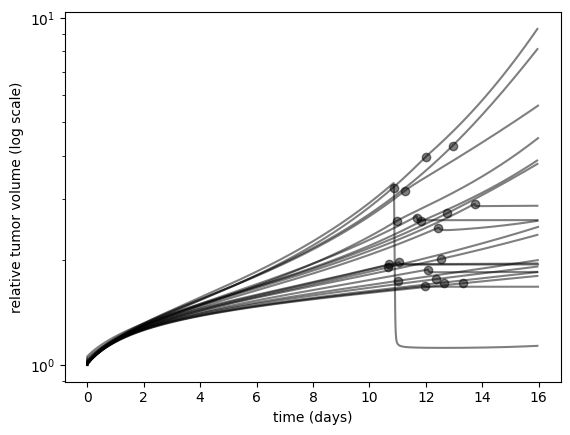

<Figure size 640x480 with 0 Axes>

In [25]:
def plot(*arg, **karg):
    plt.yscale("log")
    plt.xlabel("time (days)")
    plt.ylabel("relative tumor volume (log scale)")
    plt.plot(*arg, **karg)

cnt = 0
for params, time, volume, status in utils.read11("a.tar.gz"):
    if status == 0:
        time = np.divide(time, 60 * 60 * 24)
        volume = np.divide(volume, volume[0])
        location = params["location"]
        index = np.searchsorted(time, location)
        plot(time,
             volume,
             'k', [location], [volume[index]],
             'ok',
             alpha=0.5)
        cnt += 1
    if cnt == 20:
        break

plt.figure()
cnt = 0
for params, time, volume, status in utils.read11("b.tar.gz"):
    if status == 0:
        time = np.divide(time, 60 * 60 * 24)
        volume = np.divide(volume, volume[0])
        plot(time, volume, 'k', alpha=0.5)
        cnt += 1
    if cnt == 20:
        break